In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Date
01/01/2012    28.0
02/01/2012    28.0
03/01/2012    29.5
04/01/2012    36.5
05/01/2012    26.0
06/01/2012    21.5
07/01/2012    26.5
08/01/2012    29.5
09/01/2012    27.5
10/01/2012    29.5
11/01/2012    27.5
12/01/2012    22.0
13/01/2012    27.0
14/01/2012    22.0
15/01/2012    24.0
16/01/2012    25.0
17/01/2012    26.5
18/01/2012    30.0
19/01/2012    27.0
20/01/2012    26.5
Name: T.Max, dtype: float64


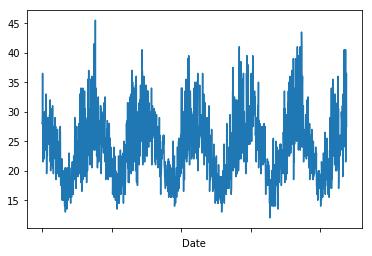

In [9]:
data=pd.read_csv('Book1.csv')
TestData=pd.read_csv('test_sydolymprk.csv')
data.index = pd.to_datetime(data.index)
series=data.set_index(['Date'])
from datetime import datetime
series=series.iloc[:, 1]
series.head()
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [10]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [11]:
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 

# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1827
Model:                     ARMA(7, 1)   Log Likelihood               -5473.754
Method:                       css-mle   S.D. of innovations              4.841
Date:                Sat, 02 Nov 2019   AIC                          10967.508
Time:                        20:12:33   BIC                          11022.612
Sample:                             0   HQIC                         10987.834
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2633      0.202      1.306      0.192      -0.132       0.658
ar.L1.y       -0.2406      0.185     -1.302      0.193      -0.603       0.122
ar.L2.y        0.1708      0.078      2.185      0.0

In [15]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 27.209625


In [16]:
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 27.209625
Day 2: 25.390279
Day 3: 26.368287
Day 4: 25.970823
Day 5: 25.253043
Day 6: 26.506580
Day 7: 27.706758
